# Analyzing NYC's Stormwater Flood Map - Extreme Flood Scenario
## Objective: Create Final Maps and Figures

Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib,geopandas

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
seaborn   : 0.11.2
matplotlib: 3.5.2
geopandas : 0.11.1



In [3]:
# importing neighborhood boundaries
path = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
nta_gdf = gpd.read_file(path)

# transform crs
nta_gdf = nta_gdf.to_crs(2263)

# preview data
print('shape of data: {}'.format(nta_gdf.shape))
nta_gdf.head()

shape of data: (262, 12)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23..."
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21..."
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19..."
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436..."
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ..."


# Percent of Buildings Flooded

In [4]:
ls data/

buildings-hazard.csv     nta-hazard.csv           stormwater-data.zip
daily-precipitation.csv  stormwater-data-source/


In [5]:
# percent of buildings flooded by nta
path = 'data/buildings-hazard.csv'
df = pd.read_csv(path)

# preview data
print(df.shape)
df.head()

(527, 8)


,nta2020,building_count,flood_classification,flooded_count,flooded_perc,ntaname,boroname,ntaname_boro
0,QN1001,23685,Deep and Contiguous Flooding,1812,7.65,South Ozone Park,Queens,"South Ozone Park, Queens"
1,QN1001,23685,Nuisance Flooding,1285,5.43,South Ozone Park,Queens,"South Ozone Park, Queens"
2,QN1303,19817,Nuisance Flooding,1691,8.53,Queens Village,Queens,"Queens Village, Queens"
3,QN1303,19817,Deep and Contiguous Flooding,1231,6.21,Queens Village,Queens,"Queens Village, Queens"
4,QN1205,18815,Deep and Contiguous Flooding,2304,12.25,St. Albans,Queens,"St. Albans, Queens"


In [6]:
# summary statistics
(df
 .groupby(by='flood_classification')['flooded_perc']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
flood_classification,,,,,,,,
Deep and Contiguous Flooding,202.0,6.760198,5.714780,0.05,2.87,5.535,9.33,35.71
Future High Tides 2080,89.0,5.404270,12.687553,0.01,0.18,0.540,2.91,76.47
Nuisance Flooding,209.0,6.423493,5.204593,0.32,3.57,5.350,7.85,50.00


In [7]:
cols = ['nta2020', 'building_count', 'flood_classification', 'flooded_count', 'flooded_perc']
classification = 'Deep and Contiguous Flooding'

merged_gdf = nta_gdf.merge(
    df.loc[df['flood_classification'] == classification, cols],
    on='nta2020',
    how='left'
)

cols = ['building_count', 'flooded_count', 'flooded_perc']
for col in cols:
    merged_gdf[col] = merged_gdf[col].fillna(0)

print(merged_gdf.shape)
merged_gdf.head()

(262, 16)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,building_count,flood_classification,flooded_count,flooded_perc
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",0.0,NaN,0.0,0.00
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",2092.0,Deep and Contiguous Flooding,121.0,5.78
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",1126.0,Deep and Contiguous Flooding,7.0,0.62
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",2002.0,Deep and Contiguous Flooding,72.0,3.60
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",1030.0,Deep and Contiguous Flooding,156.0,15.15


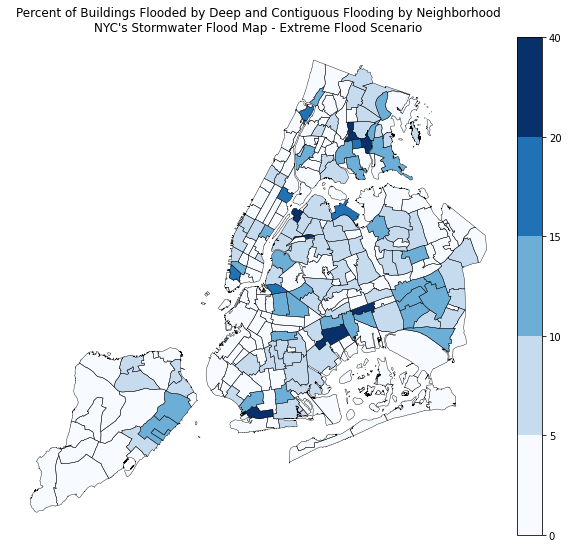

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, 5, 10, 15, 20, 40], cmap.N)

merged_gdf.plot(
    column='flooded_perc',
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax,
    cax=cax,
)

nta_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.4,
)

sup_title = "NYC's Stormwater Flood Map - Extreme Flood Scenario"
ax.set_title('Percent of Buildings Flooded by \
Deep and Contiguous Flooding by Neighborhood\n{}'.format(sup_title))
ax.axis('off')
plt.tight_layout()

In [9]:
cols = ['nta2020', 'building_count', 'flood_classification', 'flooded_count', 'flooded_perc']
classification = 'Future High Tides 2080'

merged_gdf = nta_gdf.merge(
    df.loc[df['flood_classification'] == classification, cols],
    on='nta2020',
    how='left'
)

cols = ['building_count', 'flooded_count', 'flooded_perc']
for col in cols:
    merged_gdf[col] = merged_gdf[col].fillna(0)

print(merged_gdf.shape)
merged_gdf.head()

(262, 16)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,building_count,flood_classification,flooded_count,flooded_perc
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",0.0,NaN,0.0,0.00
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",2092.0,Future High Tides 2080,72.0,3.44
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",1126.0,Future High Tides 2080,8.0,0.71
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",2002.0,Future High Tides 2080,10.0,0.50
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",1030.0,Future High Tides 2080,4.0,0.39


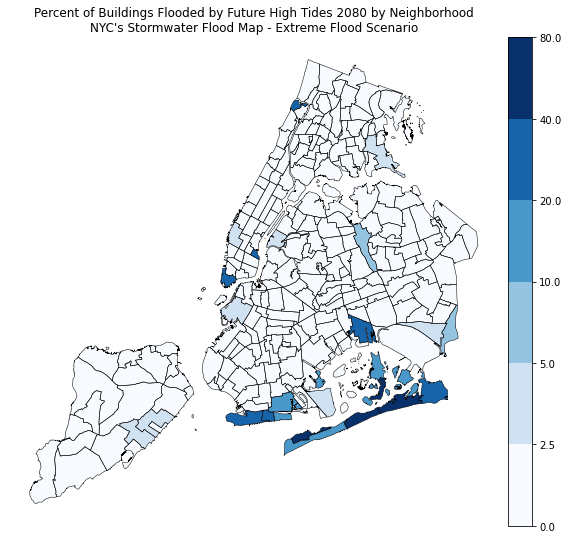

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, 2.5, 5, 10, 20, 40, 80], cmap.N)

merged_gdf.plot(
    column='flooded_perc',
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax,
    cax=cax,
)

nta_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.5,
)

sup_title = "NYC's Stormwater Flood Map - Extreme Flood Scenario"
ax.set_title('Percent of Buildings Flooded by \
Future High Tides 2080 by Neighborhood\n{}'.format(sup_title))
ax.axis('off')
plt.tight_layout()

# Percent of Area Flooded

In [11]:
ls data/

buildings-hazard.csv     nta-hazard.csv           stormwater-data.zip
daily-precipitation.csv  stormwater-data-source/


In [12]:
# percent of area flooded by nta
path = 'data/nta-hazard.csv'
df = pd.read_csv(path)

print(df.shape)
df.head()

(620, 8)


,nta2020,shape_area,flood_classification,flooded_area,flooded_area_perc,ntaname,boroname,ntaname_boro
0,BK0101,3.532121e+07,Deep and Contiguous Flooding,1.790620e+06,5.07,Greenpoint,Brooklyn,"Greenpoint, Brooklyn"
1,BK0101,3.532121e+07,Future High Tides 2080,2.038655e+06,5.77,Greenpoint,Brooklyn,"Greenpoint, Brooklyn"
2,BK0101,3.532121e+07,Nuisance Flooding,1.307740e+06,3.70,Greenpoint,Brooklyn,"Greenpoint, Brooklyn"
3,BK0102,2.885436e+07,Deep and Contiguous Flooding,1.706097e+06,5.91,Williamsburg,Brooklyn,"Williamsburg, Brooklyn"
4,BK0102,2.885436e+07,Future High Tides 2080,7.384257e+05,2.56,Williamsburg,Brooklyn,"Williamsburg, Brooklyn"


In [13]:
(df
 .groupby(by='flood_classification')['flooded_area_perc']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
flood_classification,,,,,,,,
Deep and Contiguous Flooding,240.0,3.284000,2.737847,0.01,1.1325,2.460,5.1825,14.30
Future High Tides 2080,132.0,5.445758,9.065596,0.00,0.5550,1.895,5.4325,56.21
Nuisance Flooding,248.0,3.565484,2.510365,0.02,1.6100,3.285,5.1100,11.47


In [14]:
cols = ['nta2020', 'flood_classification', 'flooded_area', 'flooded_area_perc']
classification = 'Deep and Contiguous Flooding'
merged_gdf = nta_gdf.merge(
    df.loc[df['flood_classification'] == classification, cols],
    on='nta2020',
    how='left'
)

cols = ['flooded_area', 'flooded_area_perc']
for col in cols:
    merged_gdf[col] = merged_gdf[col].fillna(0)

print(merged_gdf.shape)
merged_gdf.head()

(262, 15)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,flood_classification,flooded_area,flooded_area_perc
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",NaN,0.000000,0.00
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",Deep and Contiguous Flooding,625930.867140,2.11
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",Deep and Contiguous Flooding,77539.916379,0.67
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",Deep and Contiguous Flooding,371509.986399,1.42
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",Deep and Contiguous Flooding,622475.411398,3.74


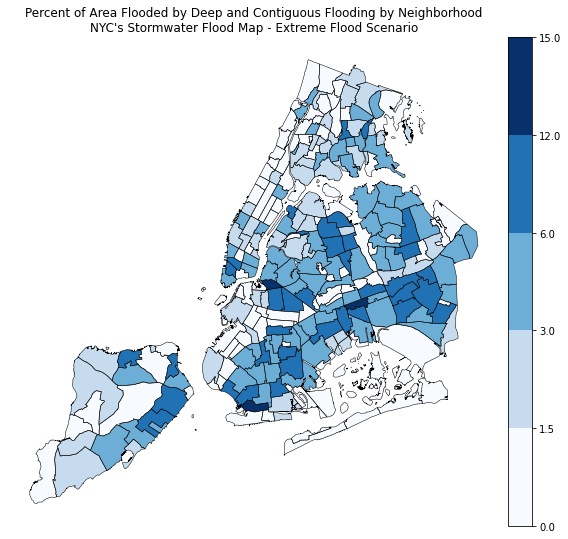

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, 1.5, 3, 6, 12, 15], cmap.N)

merged_gdf.plot(
    column='flooded_area_perc',
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax, cax=cax,
)

nta_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.5,
)

sup_title = "NYC's Stormwater Flood Map - Extreme Flood Scenario"
ax.set_title('Percent of Area Flooded by \
Deep and Contiguous Flooding by Neighborhood\n{}'.format(sup_title))
ax.axis('off')
plt.tight_layout()

In [16]:
cols = ['nta2020', 'flood_classification', 'flooded_area', 'flooded_area_perc']
classification = 'Future High Tides 2080'

merged_gdf = nta_gdf.merge(
    df.loc[df['flood_classification'] == classification, cols],
    on='nta2020',
    how='left'
)

cols = ['flooded_area', 'flooded_area_perc']
for col in cols:
    merged_gdf[col] = merged_gdf[col].fillna(0)

print(merged_gdf.shape)
merged_gdf.head()

(262, 15)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,flood_classification,flooded_area,flooded_area_perc
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",NaN,0.000000e+00,0.00
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",Future High Tides 2080,3.141988e+06,10.59
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",Future High Tides 2080,6.174623e+05,5.35
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",Future High Tides 2080,1.304307e+06,5.00
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",Future High Tides 2080,3.208221e+05,1.93


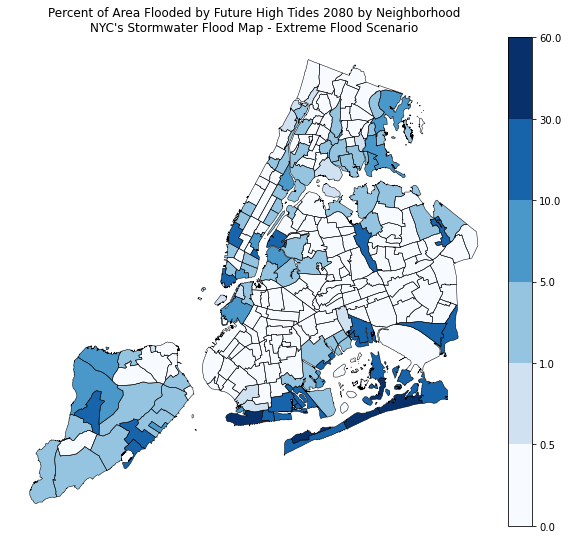

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, .5, 1, 5, 10, 30, 60], cmap.N)

merged_gdf.plot(
    column='flooded_area_perc',
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax, cax=cax,
)

nta_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.5,
)

sup_title = "NYC's Stormwater Flood Map - Extreme Flood Scenario"
ax.set_title('Percent of Area Flooded by \
Future High Tides 2080 by Neighborhood\n{}'.format(sup_title))
ax.axis('off')
plt.tight_layout()